In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import cv2
import tensorflow_datasets as tfds
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tqdm import tqdm,trange
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,BatchNormalization
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import pickle
dirpath='C:\\Users\\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\GTSRB\\traffic_sign\\'
os.listdir(dirpath) 
training_file = "C:\\Users\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\train.p"
validation_file= "C:\\Users\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\valid.p"
testing_file = "C:\\Users\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    

In [4]:
train_path = 'C:\\Users\\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\GTSRB\\traffic_sign\\Train'
test = 'C:\\Users\\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\GTSRB\\traffic_sign\\Test\\'


tr_data = []
tr_name = sorted(os.listdir(train_path)) 

for i in range(0,len(tr_name)):
  tr_data.append(train_path+'\\'+tr_name[i]+'\\')

print(tr_data[3])
print(tr_name)

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [5]:
print('train length for each train data: ',len(os.listdir(tr_data[0])))
print('test length: ',len(os.listdir(test)))
# for i in range(0,len(tr_name)):
#   tr_sum = tr_sum + len(os.listdir(tr_data[i]))

tr_sum =0
for i in range(0,len(tr_name)):
  tr_sum = tr_sum + len(os.listdir(tr_data[i]))

print(tr_sum)

train length for each train data:  210
test length:  12630
39209


In [6]:
import skimage
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


def gray_scale(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

def low_contrast(image):
    kernel=disk(30)
    low_contrast_img=rank.equalize(image,selem=kernel)
    return low_contrast_img

def normalization(image):
    image.np.divide(image,255)
    return image

In [39]:
# convert the train data to numpy
tr_label=list()
tr_traffic=np.empty(shape=(tr_sum,32,32))
x=0
for i in range(0,len(tr_name)):
  for j in range(0,len(os.listdir(tr_data[i]))):
    f=os.listdir(tr_data[i])[j]
    print(tr_data[i]+f)
    img=cv2.imread(tr_data[i]+f)
    img=cv2.resize(img,(32,32))
    img=img[:,:,::-1]/255
    img = img.astype('float32')
    img = gray_scale(img)
    img = low_contrast(img)
    tr_traffic[x]=img
    tr_label.append(tr_name[i])
    x+=1

tr_label=np.array(tr_label)

print(tr_label)

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00000_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\anaconda3\envs\tf2.0.0\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  


C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00001_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00003_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\0\00000_00005_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00000_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00000_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00000_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00003_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00005_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00008_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00010_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00013_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00016_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00018_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00021_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00023_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00023_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00023_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00026_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00028_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00030_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00033_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00035_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00037_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00037_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00037_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00038_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00038_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00038_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00038_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00040_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00042_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00044_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00044_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00044_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00045_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00045_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00045_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00045_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00047_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00049_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00051_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00051_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00051_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00051_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00051_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00052_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00052_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00054_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00056_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00058_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00061_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00063_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00065_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00068_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00070_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\1\00001_00072_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00001_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00003_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00006_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00008_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00010_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00010_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00010_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00010_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00010_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00010_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00011_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00012_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00013_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00013_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00013_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00013_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00013_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00013_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00015_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00018_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00021_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00023_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00024_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00026_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00029_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00031_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00031_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00031_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00031_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00031_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00031_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00032_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00033_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00033_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00033_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00033_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00033_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00034_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00034_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00036_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00039_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00042_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00044_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00045_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00045_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00045_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00045_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00045_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00045_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00047_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00047_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00047_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00047_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00047_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00047_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00048_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00049_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00049_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00049_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00049_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00050_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00050_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00050_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00052_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00055_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00057_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00057_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00057_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00057_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00057_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00057_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00058_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00060_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00060_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00060_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00060_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00060_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00060_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00061_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00062_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00062_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00062_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00062_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00062_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00063_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00063_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00065_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00065_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00065_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00065_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00065_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00065_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\10\00010_00066_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00001_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00001_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00001_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00001_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00001_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00002_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00002_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00004_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00007_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00010_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00013_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00016_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00019_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00021_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00024_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00027_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00029_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00030_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00030_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00030_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00030_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00030_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00030_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00032_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00035_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00038_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00040_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00042_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00042_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00042_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00043_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00043_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00043_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\11\00011_00043_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00001_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00004_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00007_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00010_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00012_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00015_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00017_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00017_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00017_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00017_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00017_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00017_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00018_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00020_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00022_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00022_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00023_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00023_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00023_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00023_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00023_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00025_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00027_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00028_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00028_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00028_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00028_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00028_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00028_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00030_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00033_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00036_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00038_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00038_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00038_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00038_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00038_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00038_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00039_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00041_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00043_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00046_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00048_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00050_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00050_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00051_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00051_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00051_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00051_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00051_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00053_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00055_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00057_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00060_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00062_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00064_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00064_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00064_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00064_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00065_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00065_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00065_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00067_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\12\00012_00069_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00002_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00004_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00007_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00009_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00009_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00009_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00010_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00010_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00010_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00010_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00012_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00014_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00014_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00014_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00015_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00015_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00015_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00015_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00017_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00019_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00022_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00024_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00026_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00026_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00027_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00027_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00027_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00027_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00027_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00029_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00032_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00034_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00037_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00039_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00041_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00044_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00046_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00048_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00051_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00053_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00055_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00055_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00056_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00056_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00056_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00056_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00056_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00058_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00061_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00063_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00065_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00068_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00070_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00070_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00070_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00070_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00070_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00070_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\13\00013_00071_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00001_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00003_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00003_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00003_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00003_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00003_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00004_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00004_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00006_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00008_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00010_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00012_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00014_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00014_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00014_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00014_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00014_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00014_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00015_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00016_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00016_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00016_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00016_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00017_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00017_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00017_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00018_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00018_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00019_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00019_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00019_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00019_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00019_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00021_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00022_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00022_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00022_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00022_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00022_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00022_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\14\00014_00024_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00000_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00003_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00005_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00008_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00014_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00016_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00016_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00016_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00016_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00017_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00017_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00017_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\15\00015_00019_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00001_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00001_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00003_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00003_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00003_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00004_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00004_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00004_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00004_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00006_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00009_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\16\00016_00012_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00000_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00000_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00003_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00006_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00008_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00011_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00013_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00016_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00018_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00021_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00023_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00023_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00023_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00023_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00026_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00029_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00031_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00031_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00032_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00032_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00032_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00032_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00032_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\17\00017_00034_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00000_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00002_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00005_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00008_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00010_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00012_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00014_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00016_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00019_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00022_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00025_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00028_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00030_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00030_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00030_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00030_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00030_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00031_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00031_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00033_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00033_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00033_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00033_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00033_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00033_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00034_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00035_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00035_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00035_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00035_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00036_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00036_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00036_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\18\00018_00038_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00002_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\19\00019_00005_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00001_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00003_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00005_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00008_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00010_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00011_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00011_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00011_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00011_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00011_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00011_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00013_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00015_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00015_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00015_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00016_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00016_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00016_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00016_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00018_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00021_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00024_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00026_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00026_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00026_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00026_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00026_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00026_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00027_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00029_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00032_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00035_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00037_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00040_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00043_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00045_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00045_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00045_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00045_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00045_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00045_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00046_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00048_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00051_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00053_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00055_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00055_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00056_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00056_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00056_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00056_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00056_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00058_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00061_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00063_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00063_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00063_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00063_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00064_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00064_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00064_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00066_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00068_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00068_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00068_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00069_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00069_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00069_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00069_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00071_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\2\00002_00074_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00002_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00005_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\20\00020_00009_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00000_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00003_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00005_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00005_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\21\00021_00008_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00000_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00002_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00003_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00003_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00003_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00003_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00003_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00003_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00005_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00008_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\22\00022_00011_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00001_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00001_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00001_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00003_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00005_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00005_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00005_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00008_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00008_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00008_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00008_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00008_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00008_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00009_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00011_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00014_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\23\00023_00016_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00002_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00005_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\24\00024_00008_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00002_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00004_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00004_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00004_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00004_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00005_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00005_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00005_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00007_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00010_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00012_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00012_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00012_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00013_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00013_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00013_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00013_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00015_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00018_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00021_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00024_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00026_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00028_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00030_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00032_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00034_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00034_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00034_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00034_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00034_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00034_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00035_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00037_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00037_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00037_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00037_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00037_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00037_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00038_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00039_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00039_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00039_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00039_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00040_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00040_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00040_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00042_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00045_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00047_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00047_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00047_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00047_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00048_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00048_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\25\00025_00048_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00000_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00003_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00006_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00009_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00011_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00012_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00012_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00012_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00012_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00012_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00012_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00014_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00014_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00014_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00014_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00014_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00015_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00015_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00016_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00016_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00016_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00017_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00017_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00017_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00017_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00019_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00019_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00019_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\26\00026_00019_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00000_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00000_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00000_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00002_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00005_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00005_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\27\00027_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00003_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00006_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00008_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00008_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00008_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00009_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00009_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00009_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00009_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00011_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00014_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\28\00028_00017_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00001_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00004_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00007_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00007_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00007_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00007_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00008_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00008_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\29\00029_00008_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00001_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00003_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00006_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00008_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00010_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00012_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00015_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00017_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00019_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00021_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00024_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00026_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00028_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00031_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00034_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00036_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00038_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00040_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00043_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00045_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00045_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00046_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00046_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00046_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00046_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\3\00003_00046_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00001_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00004_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00007_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00010_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\30\00030_00013_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00000_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00000_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00003_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00006_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00008_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00009_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00009_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00009_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00009_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00009_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00009_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00011_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00014_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00016_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00017_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00017_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00017_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00017_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00017_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00017_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00019_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00022_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\31\00031_00025_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00002_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00005_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00006_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00006_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00006_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00006_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00006_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\32\00032_00006_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00001_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00003_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00003_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00004_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00004_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00004_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00004_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00004_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00006_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00008_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00011_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00013_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00013_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00014_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00014_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00014_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00014_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00014_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00016_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00019_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\33\00033_00022_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00002_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00005_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00008_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\34\00034_00011_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00000_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00002_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00005_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00007_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00010_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00012_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00014_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00016_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00016_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00016_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00016_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00017_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00017_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00017_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00019_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00021_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00023_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00025_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00025_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00025_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00026_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00026_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00026_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00026_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00028_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00030_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00032_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00034_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00035_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00035_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00035_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00035_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00035_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00035_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00037_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\35\00035_00039_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00002_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00005_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00008_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00011_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00011_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00011_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00011_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00012_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00012_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\36\00036_00012_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00001_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00002_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00002_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00002_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00002_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00002_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00002_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\37\00037_00005_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00000_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00003_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00006_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00009_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00011_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00014_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00016_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00018_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00021_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00023_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00025_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00025_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00025_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00026_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00026_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00026_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00026_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00028_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00030_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00032_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00034_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00036_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00039_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00042_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00045_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00048_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00051_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00053_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00053_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00053_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00053_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00053_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00053_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00054_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00056_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00058_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00061_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00064_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\38\00038_00067_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00001_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00004_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00007_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00008_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00008_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00008_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00008_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00008_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\39\00039_00008_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00000_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00001_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00001_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00001_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00003_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00003_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00003_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00003_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00004_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00004_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00004_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00006_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00009_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00012_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00015_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00017_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00019_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00021_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00023_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00025_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00025_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00026_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00026_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00026_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00026_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00026_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00028_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00028_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00029_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00029_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00029_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00029_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00029_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00031_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00031_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00031_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00031_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00031_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00032_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00032_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00033_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00034_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00034_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00034_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00034_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00034_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00034_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00036_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00039_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00042_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00045_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00047_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00049_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00051_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00053_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00053_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00053_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00053_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00053_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00053_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00054_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00055_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00055_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00056_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00056_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00056_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00056_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00056_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00058_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00060_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00062_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\4\00004_00064_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00001_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00004_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00006_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00007_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00007_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00007_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00007_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00007_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00007_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\40\00040_00010_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00001_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00004_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00004_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00004_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00004_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00004_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00005_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\41\00041_00005_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00000_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00004_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_p

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00007_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00007_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00007_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00007_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00007_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\42\00042_00007_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00000_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_pr

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00002_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00002_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00003_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00003_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00003_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00003_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00003_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00005_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00007_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00009_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00011_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00011_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00012_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00012_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00012_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00012_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00012_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00014_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00015_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00015_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00015_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00015_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00015_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00015_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00017_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00017_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00017_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00017_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00017_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00017_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00018_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00019_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00019_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00019_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00020_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00020_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00020_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00020_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00022_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00024_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00026_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00028_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00030_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00032_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00032_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00032_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00032_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00033_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00033_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00033_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00035_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00037_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00039_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00041_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00044_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00046_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00049_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00051_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00053_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00055_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00055_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00055_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00055_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00055_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00056_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00056_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00058_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00058_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00058_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00058_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00059_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00059_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00059_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00061_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\5\00005_00061_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00000_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00000_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00000_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00000_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00000_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00003_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00006_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00009_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00009_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00010_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00010_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00010_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00010_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00010_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\6\00006_00013_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00001_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00001_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00001_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00001_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00002_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00002_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00002_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00004_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00006_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00008_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00008_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00009_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00009_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00009_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00009_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00009_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00011_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00013_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00013_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00013_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00013_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00013_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00014_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00014_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00015_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00015_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00015_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00016_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00016_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00016_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00016_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00018_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00018_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00019_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00019_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00019_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00019_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00019_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00021_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00023_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00025_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00025_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00025_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00026_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00026_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00026_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00026_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00028_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00030_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00031_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00031_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00031_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00031_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00031_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00031_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00033_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00035_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00035_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00035_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00035_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00035_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00036_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00036_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00038_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00040_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00043_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00045_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\7\00007_00047_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00001_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00004_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00006_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00009_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00011_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00013_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00013_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00013_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00014_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00014_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00014_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00014_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00016_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00023.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00018_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00020_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00020_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00020_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00021_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00021_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00021_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00021_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00024_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00026_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00028_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00030_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00032_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00032_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00032_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00033_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00033_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00033_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00033_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00035_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00038_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00041_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00043_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\8\00008_00045_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00000_00024.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00000_00025.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00000_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00000_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00000_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00000_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00001_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00002_00026.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00002_00027.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00002_00028.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00002_00029.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00003_00000.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00003_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00003_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00005_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00007_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00001.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00010_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00012_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00015_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00002.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00018_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00020_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00022_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00021.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00024_00022.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00027_00020.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00030_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00032_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00035_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00003.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00004.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00038_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00040_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00018.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00042_00019.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00012.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00013.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00014.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00015.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00016.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00045_00017.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00005.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00006.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00007.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00008.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00009.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00010.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\traffic_identification\GTSRB\traffic_sign\Train\9\00009_00048_00011.png
C:\Users\PCUSER\Desktop\junior\numerical_method\final_project\

In [8]:
print(tr_label.shape)

(39209,)


In [9]:
# convert the test data to numpy
from skimage.util import img_as_ubyte
te_filename=list()
te_data=np.empty(shape=(len(os.listdir(test)),32,32))
for i in range(len(os.listdir(test))):
  f=os.listdir(test)[i]
  te_filename.append(f)
  img=cv2.imread(test+f)
  img =  img.astype(np.uint8)
  img=cv2.resize(img,(32,32))
  img=img[:,:,::-1]/255
  img = img.astype('float32')
  img = gray_scale(img)
  img = low_contrast(img)
  te_data[i]=img

print(len(te_data))

C:\Users\PCUSER\anaconda3\envs\tf2.0.0\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  


12630


In [35]:
import matplotlib.pyplot as plt
import random
def list_images(dataset, dataset_y, ylabel="", cmap=None):
    """
    Display a list of images in a single figure with matplotlib.
        Parameters:
            images: An np.array compatible with plt.imshow.
            lanel (Default = No label): A string to be used as a label for each image.
            cmap (Default = None): Used to display gray images.
    """
    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.xlabel(dataset_y[indx])
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

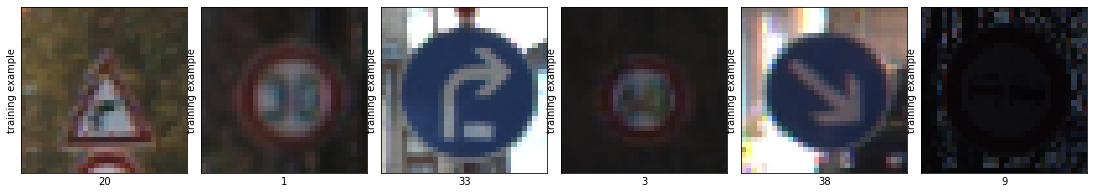

In [37]:
list_images(tr_traffic,tr_label,'training example')

In [12]:
print('train data size:',tr_traffic.shape)
print('train label size:',len(tr_label))
print('test data size:',te_data.shape)

train data size: (39209, 32, 32)
train label size: 39209
test data size: (12630, 32, 32)


In [13]:
# on-hot label
from tensorflow.keras.utils import to_categorical
tr_label=to_categorical(tr_label)
# 打亂資料順序
from sklearn.utils import shuffle
train_data,train_label=shuffle(tr_traffic,tr_label,random_state=0)
print(train_label.shape)

(39209, 43)


In [14]:
train_data_gen = train_data[0:22656]
val_data_gen = train_data[22656:]
train_label_gen = train_label[0:22656,:]
val_label_gen =  train_label[22656:,:]


train_data_gen = train_data_gen.reshape(train_data_gen.shape[0],32,32,1)
val_data_gen = val_data_gen.reshape(val_data_gen.shape[0],32,32,1)

print('train data size: ',train_data_gen.shape)
print('validation data size: ',val_data_gen.shape)
print('train label size: ',train_label_gen.shape)
print('validation label size: ',val_label_gen.shape)

train data size:  (22656, 32, 32, 1)
validation data size:  (16553, 32, 32, 1)
train label size:  (22656, 43)
validation label size:  (16553, 43)


In [15]:
imgSize=(32,32)
imgShape=(32,32,1)
batchSize=32

from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # 以每一張feature map為單位將平均值設為0
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # 以每一張feature map為單位將數值除以其標準差(上述兩步驟就是我們常見的Standardization)
        samplewise_std_normalization=False,  #  將输入的每個樣本除以其自身的標準差。
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # 隨機旋轉圖片
        zoom_range = 0.1, #  隨機縮放範圍
        width_shift_range=0.1,  #  水平平移，相對總寬度的比例
        height_shift_range=0.1,  # 垂直平移，相對總高度的比例
        horizontal_flip=False,  # 一半影象水平翻轉
        vertical_flip=False)  # 一半影象垂直翻轉
        
datagen.fit(tr_traffic.reshape(39209,32,32,1))


Using TensorFlow backend.


In [16]:

# Label Overview
classes = { 0:'Speed limit (5km/h)',
            1:'Speed limit (15km/h)', 
            2:'Speed limit (30km/h)', 
            3:'Speed limit (40km/h)', 
            4:'Speed limit (50km/h)', 
            5:'Speed limit (60km/h)', 
            6:'Speed limit (70km/h)', 
            7:'Speed limit (80km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' ,
}

## Training Model

In [17]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.initializers import he_normal
from tensorflow.keras import regularizers
# define model
cnn=models.Sequential() # name the network
# feature extraction
#1 layer
cnn.add(layers.Conv2D(filters=32,kernel_size=(3,3), input_shape=(32,32,1),padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))
#2 layer
cnn.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))

cnn.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

#3 layer
cnn.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))

#3 layer
cnn.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))



cnn.add(layers.GlobalAveragePooling2D())
# neron network
cnn.add(layers.Dense(units=512,activation='relu',kernel_initializer = he_normal(),kernel_regularizer = regularizers.l2(l=0.001)))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))
cnn.add(Dropout(0.25))
cnn.add(layers.Dense(units=512,activation='relu',kernel_initializer = he_normal(),kernel_regularizer = regularizers.l2(l=0.001)))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))
cnn.add(Dropout(0.5))
cnn.add(layers.Dense(units=256,activation='relu',kernel_initializer = he_normal(),kernel_regularizer = regularizers.l2(l=0.001)))
cnn.add(BatchNormalization())
cnn.add(Activation("relu"))
cnn.add(Dropout(0.5))
cnn.add(layers.Dense(units=128,activation='relu',kernel_initializer = he_normal(),kernel_regularizer = regularizers.l2(l=0.001)))
cnn.add(Dropout(0.5))
cnn.add(layers.Dense(units=43,activation='softmax'))
# show the model structure
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [18]:
from tensorflow.keras.optimizers import Adam
cnn.compile(optimizer = Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
estop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# # 設定模型儲存條件
# checkpoint = ModelCheckpoint('InceptionResNetV2_checkpoint_v2.h5', verbose=1,
#                           monitor='val_loss', save_best_only=True,
#                           mode='min')

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint("traffic_sign_identification_new2.h5", verbose=1, save_best_only=True)

# 設定lr降低條件(0.001 → 0.0005 → 0.00025 → 0.000125 → 0.0001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                           patience=5, mode='min', verbose=1,
                           min_lr=1e-5)

In [21]:

epoch=50
# with tf.device('/gpu:0'):
#     history = cnn.fit(
#       trainBatch,
#       steps_per_epoch = trainBatch.samples // batchSize,
#       validation_data = valBatch,
#       validation_steps = valBatch.samples // batchSize,
#       epochs=epoch,callbacks =[checkpointer,estop, reduce_lr]
#     )
with tf.device('/gpu:0'):
    history = cnn.fit_generator(datagen.flow(train_data_gen, train_label_gen, batch_size=32),shuffle=True,epochs=epoch, 
                                  validation_data = (val_data_gen, val_label_gen),
                                  verbose = 2, #verbose=2過程全顯示
                                  steps_per_epoch=train_data.shape[0] // 32,
                                  callbacks=[checkpointer,estop]) #we save the best weights with checkpointer

Epoch 1/50

Epoch 00001: val_loss improved from 2.90775 to 0.84606, saving model to traffic_sign_identification_new2.h5
1225/1225 - 106s - loss: 1.3250 - accuracy: 0.7640 - val_loss: 0.8461 - val_accuracy: 0.9041
Epoch 2/50

Epoch 00002: val_loss improved from 0.84606 to 0.82420, saving model to traffic_sign_identification_new2.h5
1225/1225 - 103s - loss: 0.9232 - accuracy: 0.8669 - val_loss: 0.8242 - val_accuracy: 0.9045
Epoch 3/50

Epoch 00003: val_loss improved from 0.82420 to 0.78763, saving model to traffic_sign_identification_new2.h5
1225/1225 - 103s - loss: 0.7407 - accuracy: 0.9133 - val_loss: 0.7876 - val_accuracy: 0.8936
Epoch 4/50

Epoch 00004: val_loss improved from 0.78763 to 0.45915, saving model to traffic_sign_identification_new2.h5
1225/1225 - 102s - loss: 0.6395 - accuracy: 0.9353 - val_loss: 0.4591 - val_accuracy: 0.9856
Epoch 5/50

Epoch 00005: val_loss did not improve from 0.45915
1225/1225 - 107s - loss: 0.5865 - accuracy: 0.9457 - val_loss: 0.4627 - val_accuracy:

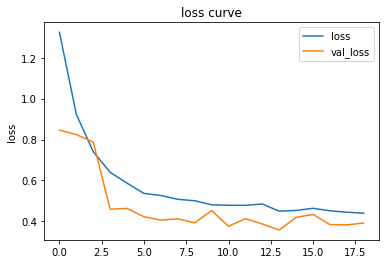

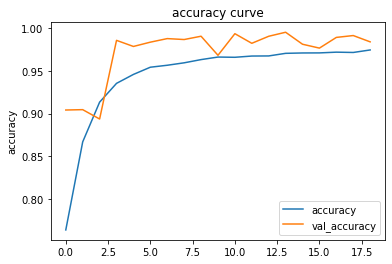

In [22]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
pre=cnn.predict(val_data_gen)
pre=np.argmax(pre,axis=1)

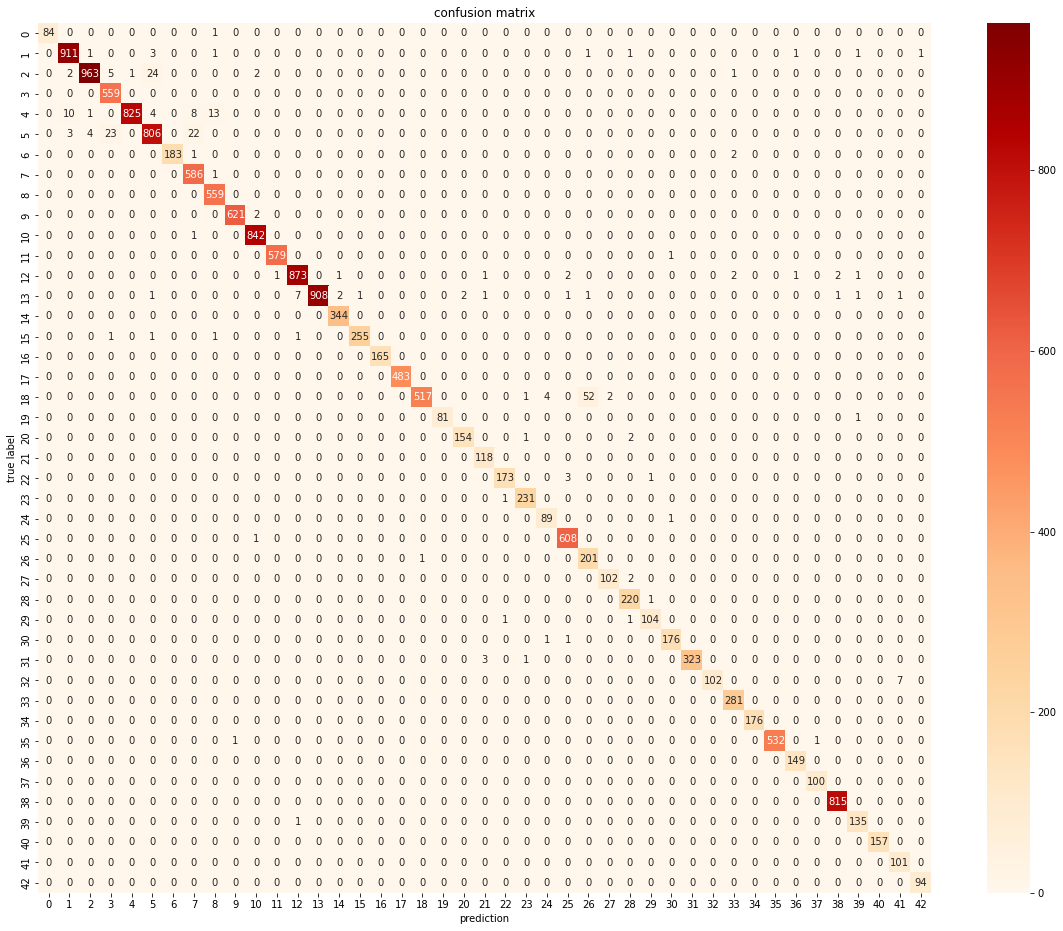

In [32]:
#confusion matrix
import seaborn as sn
cm=confusion_matrix(pre,np.argmax(val_label_gen,axis=1))
fit=plt.figure(figsize=(20,16))
plt.title('confusion matrix')
sn.heatmap(cm,annot=True,cmap='OrRd',fmt='g')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()

In [46]:
prediction_label=prediction.argmax(axis=1)
filename=testBatch.filenames
for i in range(len(filename)):
    filename[i] = filename[i].replace('test\\','')
outputdf=pd.DataFrame()
outputdf['Name']=filename
outputdf['Label']=prediction_label
outputdf.to_csv('C:\\Users\\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\traffic_sign_predict.csv',index=False)

In [ ]:
# C:\\Users\\PCUSER\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\GTSRB\\traffic_sign\\Test

In [8]:
# data_path =[]

# dataset = pd.read_csv("C:\\Users\\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\GTSRB\\Test.csv", delimiter=",")
# data_id ['ClassId'] = dataset['ClassId'].astype(str).str.zfill(5)
# for i in range(12630):
#     data_path.append(dataset.iat[i,7])
#     data_id.append(int((dataset.iat[i,6])))
# # print(data_id)

In [39]:
with tf.device('/gpu:0'):
    val_score = classification_model.evaluate_generator(valBatch)
    print('Test loss:', val_score[0])
    print('Test accuracy:', val_score[1])

Test loss: 0.481255276736034
Test accuracy: 0.9144703


In [40]:
import sys
with tf.device('/gpu:0'):
    score = classification_model.predict_generator(testBatch)
    y_classes = score.argmax(axis=-1)
print(y_classes)

[ 8  1 32 ... 39 40  2]


In [41]:
import numpy as np
import pandas as pd
def load_csv_data(file):
    return pd.read_csv(file)

data = load_csv_data('C:\\Users\\PCUSER\\Desktop\\junior\\numerical_method\\final_project\\traffic_identification\\GTSRB\\Test.csv')
class_id = data.iloc[:,6].values
print(class_id)

[16  1 38 ...  6  7 10]


In [43]:
data_id = np.array(class_id)
different =0

for i in range(len(data_id)):
    if y_classes[i] != data_id[i]:
        different+=1
        

print('accuracy:',1-different/len(data_id))

accuracy: 0.05732383214568493
